# Intro to `pandorasim`

This notebook will show you how to use the updated `pandorasim` `v1.0.0`. 

In [1]:
from pandorasim import VisibleSim, NIRSim
import astropy.units as u

To create a simulation we're going to take the following steps

- Initialize a `Simulator` object
- `point` towards a given sky location
- `observe` with given instrument parameters

Once we `observe` we will get back a *.fits* file that contains our Current Best Estimates of what Pandora will see.

**Note:** For all DPC pandora software you will have to use `astropy.units` to work with the tools. `astropy.units` ensures that you are always using the correct variables/units for your simulations. This helps us ensure that we don't have any problems converting between units, and will prevent us from using the wrong variables in key places.

## Visible Simulations

To create a visible simulation we're first going to initialize a `VisibleSim` object and then point it towards a target. Use the `?` symbol to look at the docstrings of any functions to see optional parameters.

I am going to point towards `K2-18`. I will use `astropy.coordinates.SkyCoord` to get the RA and Dec, but you can choose your coordinates however you like.

In [2]:
from astropy.coordinates import SkyCoord
c = SkyCoord.from_name("K2-18")

In [3]:
# Initialize a simulator object
sim = VisibleSim()
# Point the simulator
sim.point(c.ra, c.dec, -40*u.deg)

The `sim` object we've initialized and pointed has several useful attributes

In [4]:
sim

VISDA Simulation [(172.560 deg, 7.588 deg)]

In [5]:
sim.ra, sim.dec

(<Longitude 172.5604906 deg>, <Latitude 7.58840426 deg>)

In [6]:
sim.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 172.56049060233  7.58840426347  
CRPIX : 1024.0  1024.0  
PC1_1 PC1_2  : 0.766044443118978  0.6427876096865393  
PC2_1 PC2_2  : -0.6427876096865393  0.766044443118978  
CDELT : -0.00021666666666666  0.000216666666666666  
NAXIS : 2048.0  2048.0

The simulator also has a `source_catalog` object which you can use to see what sources fall on the detector, and how bright they are. 

In [7]:
sim.source_catalog

,ra,dec,mag,row,column,jmag,teff,logg,ruwe,ang_sep,counts,flux
0,172.559921,7.587471,13.711370,1021.375231,1027.767630,9.763,3178.587891,4.0749,1.428781,0.000691,11258.582615,11258.582615
1,172.569891,7.561295,15.346563,899.332727,1070.474857,13.662,5461.924316,4.5400,0.932473,0.028671,2496.931169,2496.931169
2,172.555500,7.553237,17.837317,913.020551,1144.814652,15.433,4326.975586,4.3848,0.904185,0.035496,251.828745,251.828745
3,172.553943,7.552576,17.621460,915.241681,1152.232010,14.386,3853.099121,4.7691,0.992788,0.036368,307.218894,307.218894
4,172.598808,7.601241,15.477561,955.257471,850.630218,13.710,5476.727051,4.5452,1.011793,0.040077,2213.132967,2213.132967
...,...,...,...,...,...,...,...,...,...,...,...,...
86,172.583918,7.842383,13.701071,1832.495772,186.486638,12.591,6125.850098,4.1992,1.240424,0.255028,11365.893755,11365.893755
87,172.571944,7.329055,17.274900,52.453017,1752.047166,15.707,5240.724609,4.7141,1.112759,0.259592,422.738432,422.738432
88,172.578908,7.853249,13.978366,1884.058863,171.717748,12.593,5824.639160,4.1140,0.967238,0.265472,8804.111763,8804.111763
89,172.299033,7.650287,16.322451,1989.630521,1756.331593,13.955,4460.646973,4.4594,1.095914,0.266438,1016.369564,1016.369564


The simulator object has access to other objects from the DPC software suite:

- `sim.detector` is a `pandorasat` object that houses all the information about the detectors
- `sim.psf` is a `pandorapsf.PSF` object that contains all the information and functions that create PSFs/PRFs.
- `sim.scene` and `sim.roiscene` are `pandorapsf.Scene` objects that are used by the simulator to make sky scenes given the Pandora PSF and a source catalog.

In [8]:
sim.detector

VisibleDetector

In [9]:
sim.psf

2D PSF Model [row, column]

In [10]:
sim.scene

Scene Object [2D PSF Model [row, column]] Detector Size: (2048, 2048), ntargets: 91

In [11]:
sim.roiscene

ROIScene Object [2D PSF Model [row, column]] Detector Size: (2048, 2048), ntargets: 11, nROIs: 9

Mostly you won't need to use these objects, and if you want to see more on how to use them and what they do, you should start with the documentation from thier respective packages. 

Now that we've pointed we can look at an FFI. Below the red regions show where the Regions of Interest are. The visible simulator will pick ROIs for you when you point, but you can update them.

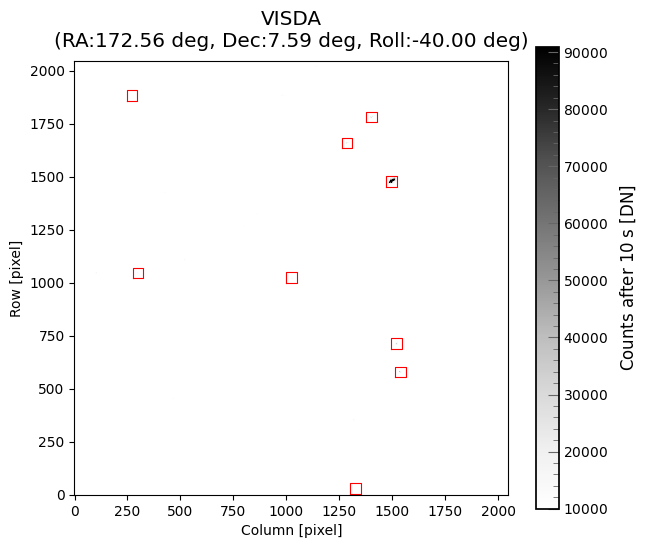

In [12]:
sim.show_FFI();

We can also show the regions of interest we expect on the visible side. 

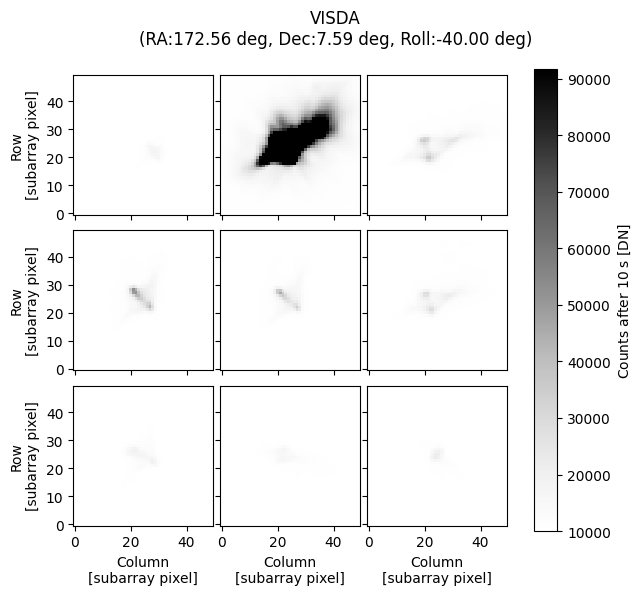

In [13]:
sim.show_ROI();

Finally, we can `observe` a given part of the sky to get back a fits file with the properties we are expecting. 

For the `VisibleSim` object observe has two parameters that set the size of the observation. 

- `nreads` sets how many reads of the detector are **coadded together to create a frame**.
- `nframes` sets how many frames will be returned.

You can turn off simulation of the jitter of the spacecraft and the noise of the detector by using the `jitter` and `noise` keywords. 

In [14]:
hdulist = sim.observe()

Modeling Pixel Positions: 100%|█████████████████| 22/22 [00:01<00:00, 20.04it/s]


`observe` will return an `astropy.io.fits.HDUList` object

In [15]:
hdulist.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   ()      
  1  SCIENCE       1 ImageHDU        75   (150, 150, 100)   int64   
  2  ROITABLE      1 BinTableHDU     36   2R x 9C   ['D', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'K']   


You can write this object to file using

```python
    hdulist.writeto("FILENAME.fits", overwrite=True)
```

If you want to work with the data as an array instead, you can set `output_type` to `"array"`.

In [16]:
data = sim.observe(output_type="array")

Modeling Pixel Positions: 100%|█████████████████| 20/20 [00:01<00:00, 19.60it/s]


This returns an `np.ndarray` with shape `(nROIs, nframes, nrows, ncolumns)`.

In [17]:
data.shape

(9, 100, 50, 50)

You can use convenience plotting functions from `pandorasat` to show the image of each ROI

In [18]:
from pandorasat.plotting import animate
animate(data[0])

Or you can save the output as *mp4*s or *gif*s using
```python
from pandorasat.plotting import save_mp4, save_gif
save_mp4(data[0], "output.mp4")
save_gif(data[0], "output.gif")
```

By default there is no time-series variabilty in the stars that are modeled. You can include time-series variability by passing a function to `observe`. 

Your function **must**:

- Take in time in JD as a parameter
- Return a normalized flux value as a float that has the same shape as the input time.

Below is an example function

In [19]:
import numpy as np
def astro_func(time):
    period = (3*u.hour).to(u.day).value
    return 1 + 0.1 * np.sin((2*np.pi/period) * time + 4.034)

In [20]:
hdulist = sim.observe(target_flux_function=astro_func)

Modeling Pixel Positions: 100%|█████████████████| 21/21 [00:00<00:00, 21.57it/s]


You can also change the start time of the simulation 

In [21]:
from astropy.time import Time
hdulist = sim.observe(target_flux_function=astro_func, start_time=Time.now())

Modeling Pixel Positions: 100%|█████████████████| 22/22 [00:01<00:00, 20.48it/s]


For the visible simulator, the shape is in frames. The exposure time of each frame is given in the fits files. You can use this to calculate the time array for the observations

In [22]:
t = (np.arange(hdulist[1].header['NAXIS3']) * hdulist[0].header['FRMTIME']) * u.second
t

<Quantity [  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.,
           100., 110., 120., 130., 140., 150., 160., 170., 180., 190.,
           200., 210., 220., 230., 240., 250., 260., 270., 280., 290.,
           300., 310., 320., 330., 340., 350., 360., 370., 380., 390.,
           400., 410., 420., 430., 440., 450., 460., 470., 480., 490.,
           500., 510., 520., 530., 540., 550., 560., 570., 580., 590.,
           600., 610., 620., 630., 640., 650., 660., 670., 680., 690.,
           700., 710., 720., 730., 740., 750., 760., 770., 780., 790.,
           800., 810., 820., 830., 840., 850., 860., 870., 880., 890.,
           900., 910., 920., 930., 940., 950., 960., 970., 980., 990.] s>

## NIR Simulations

To create an IR simulation we're first going to initialize a `NIRSim` object and then point it towards a target. Use the `?` symbol to look at the docstrings of any functions to see optional parameters.

In [23]:
sim = NIRSim()

In [24]:
sim.point(c.ra, c.dec, -40*u.deg)

2025-04-09 12:14:41 WARNING: 0.0K source in catalog is not modelable. Setting to 2000K.

2025-04-09 12:14:41 WARNING: 0.0K source in catalog is not modelable. Setting to 2000K.

The simulator has a lot of the same useful attributes

In [25]:
sim.ra, sim.dec

(<Longitude 172.5604906 deg>, <Latitude 7.58840426 deg>)

In [26]:
sim.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 172.56049060233  7.58840426347  
CRPIX : 40.0  300.0  
PC1_1 PC1_2  : 0.766044443118978  0.6427876096865393  
PC2_1 PC2_2  : -0.6427876096865393  0.766044443118978  
CDELT : -0.00033055555555555  0.000330555555555555  
NAXIS : 2048.0  2048.0

In [27]:
sim.source_catalog

,ra,dec,mag,row,column,jmag,teff,logg,ruwe,ang_sep
0,172.559921,7.587471,13.711370,297.934875,42.124998,9.763000,3178.587891,4.0749,1.428781,0.000691
1,172.586015,7.579007,20.522991,227.805526,-1.357378,16.504999,NaN,NaN,0.962860,0.026994
2,172.569891,7.561295,15.346563,217.811465,70.115786,13.662000,5461.924316,4.5400,0.932473,0.028671
3,172.589096,7.570347,20.480492,201.672956,8.403793,16.913000,NaN,NaN,1.040198,0.033635
4,172.529139,7.646141,19.571917,491.648503,-1.286717,15.687000,3355.880127,4.3568,1.092201,0.065533
5,172.525323,7.645973,20.085798,498.533526,7.805897,15.984000,3316.219238,4.9398,1.014244,0.067247


The simulator object has access to other objects from the DPC software suite, including `detector` and `psf`, but now has access to a `TraceScene` object from `pandorapsf` which enables us to make traces.

In [28]:
sim.tracescene

TraceScene Object [1D PSF Model [wavelength] (Frozen: row: 0.000 pix, column: 0.000 pix)]

We can show what we expect to see on sky

In [29]:
sim.show_subarray();

ValueError: `spectra` must have shape (nwav, ntargets)

You can also `observe`, but for the IR side you need to set the parameters for the instrument. Check out the docstring of observe for more details

In [ ]:
sim.observe?

If you want to visualize your instrument settings you can use the `plot_nirda_integrations` function from `pandorasim` which will help you see the impacts of each setting.

In [ ]:
from pandorasim import plot_nirda_integrations

In [ ]:
plot_nirda_integrations(SC_Resets1=1,
    SC_Resets2=1,
    SC_DropFrames1=0,
    SC_DropFrames2=16,
    SC_DropFrames3=0,
    SC_ReadFrames=10,
    SC_Groups=2,
    SC_Integrations=5);

`observe` has the sane defaults given how Pandora will usually operate

In [ ]:
hdulist = sim.observe()

In [ ]:
hdulist.info()

This will return a *.fits* file which contains every averaged group from every exposure. 

In [ ]:
data = sim.observe(output_type="array")

Below I am animating every integration of the spectrum in the last group.

In [ ]:
from pandorasat.plotting import animate
animate(data[:, -1])